In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load sample image
IMG_PATH = 'ggs.png'
image = plt.imread(IMG_PATH)

In [3]:
org_img_size = os.stat(IMG_PATH).st_size/1024
print('Original image size: {0:4.4f} kB'.format(org_img_size))

Original image size: 669.7949 kB


In [4]:
# Perform PCA
compressed_image = np.zeros((*image.shape[:2], 3))
for ch in range(3):
    n_comp = 50# min(image.shape[0], image.shape[1])
    pca = PCA(n_components=n_comp) # Retain 95% of variance
    transformed_image = pca.fit_transform(image[:,:,ch])
    print('Explained variance in Ch-{0:d}: {1:4.4f}'.format(ch, sum(pca.explained_variance_ratio_)))
    
    compressed_image[:,:,ch] = pca.inverse_transform(transformed_image)
    ## image normalization
    cmin = compressed_image[:,:,ch].min()
    cmax = compressed_image[:,:,ch].max()
    compressed_image[:,:,ch] = (compressed_image[:,:,ch] - cmin)/(cmax - cmin)

Explained variance in Ch-0: 0.9839
Explained variance in Ch-1: 0.9802
Explained variance in Ch-2: 0.9761


In [5]:
# Reshape compressed image back to original shape
plt.imsave("compressed_img.jpg", compressed_image)
os.stat('compressed_img.jpg').st_size/1024

86.4462890625

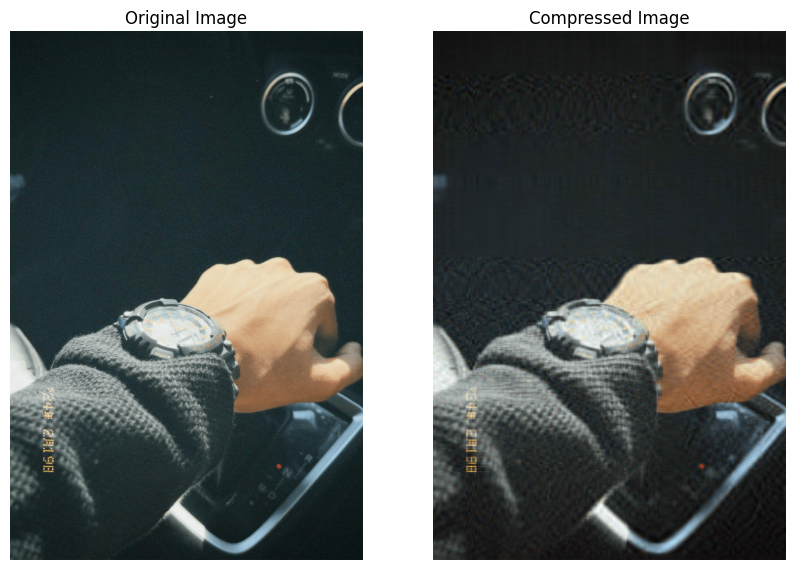

In [6]:
# Display original image
plt.figure(figsize=(10, 15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display compressed image
plt.subplot(1,2,2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')
plt.show()

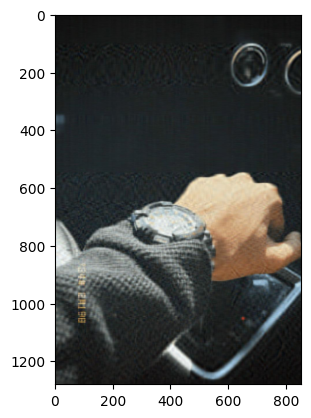

In [7]:
image = plt.imread('compressed_img.jpg')
plt.imshow(image)